In [1]:
import json
import pandas as pd


In [2]:
# Load the JSON file
with open('./Spotify Account Data/StreamingHistory_music_0.json', 'r',encoding='utf-8') as file:
    data = json.load(file)

In [3]:
df = pd.DataFrame(data)
df.head()

,endTime,artistName,trackName,msPlayed
0,2023-08-12 12:42,Javed Ali,Ek Din Teri Raahon,231549
1,2023-08-17 15:54,Shoffy,I Can't Help,6490
2,2023-08-17 15:54,Sandesh Shandilya,Deewana Hai Dekho,20700
3,2023-08-17 15:54,Alka Yagnik,Tere Naam,2900
4,2023-08-17 15:57,Baby Keem,16,156040


In [5]:
df['minutesPlayed'] = df['msPlayed']/1000/60
df.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed
0,2023-08-12 12:42,Javed Ali,Ek Din Teri Raahon,231549,3.859150
1,2023-08-17 15:54,Shoffy,I Can't Help,6490,0.108167
2,2023-08-17 15:54,Sandesh Shandilya,Deewana Hai Dekho,20700,0.345000
3,2023-08-17 15:54,Alka Yagnik,Tere Naam,2900,0.048333
4,2023-08-17 15:57,Baby Keem,16,156040,2.600667


In [15]:
df['endTime'] = pd.to_datetime(df['endTime'],format='%Y-%m-%d %H:%M')

In [16]:
df.describe()

,endTime,msPlayed,minutesPlayed
count,8370,8.370000e+03,8370.000000
mean,2024-02-28 05:16:50.473118464,1.657387e+05,2.762312
min,2023-08-12 12:42:00,0.000000e+00,0.000000
25%,2023-12-16 06:46:00,4.351000e+04,0.725167
50%,2024-03-02 11:03:30,1.881075e+05,3.135125
75%,2024-05-29 12:40:15,2.529870e+05,4.216450
max,2024-08-13 12:51:00,1.744536e+06,29.075600
std,NaN,1.137720e+05,1.896200


In [28]:
df[df['endTime']>='2024-01-01']['minutesPlayed'].sum()

14254.068533333333

In [29]:
df['year-month'] = df['endTime'].dt.to_period('M')
df.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed,year-month
0,2023-08-12 12:42:00,Javed Ali,Ek Din Teri Raahon,231549,3.859150,2023-08
1,2023-08-17 15:54:00,Shoffy,I Can't Help,6490,0.108167,2023-08
2,2023-08-17 15:54:00,Sandesh Shandilya,Deewana Hai Dekho,20700,0.345000,2023-08
3,2023-08-17 15:54:00,Alka Yagnik,Tere Naam,2900,0.048333,2023-08
4,2023-08-17 15:57:00,Baby Keem,16,156040,2.600667,2023-08


In [31]:
# # Convert 'msPlayed' from milliseconds to minutes
# df['minutesPlayed'] = df['msPlayed'] / 1000 / 60

# Group by 'year_month' and calculate the total minutes played per month
monthly_minutes = df.groupby('year-month')['minutesPlayed'].sum().reset_index()
monthly_minutes

,year-month,minutesPlayed
0,2023-08,586.904733
1,2023-09,369.773067
2,2023-10,1624.239750
3,2023-11,1889.132467
4,2023-12,4396.430150
5,2024-01,1321.780583
6,2024-02,999.316667
7,2024-03,1726.361500
8,2024-04,2411.234050
9,2024-05,2023.017517


In [34]:
# Calculate the average listening time per month
average_minutes_per_month = monthly_minutes['minutesPlayed'].mean()

print(f"Average minutes listened per month: {average_minutes_per_month:.2f} minutes or {average_minutes_per_month/60:.2f} hours")

Average minutes listened per month: 1778.50 minutes or 29.64 hours


In [42]:
# Group by year_month and artistName to sum up the minutes played for each artist each month
monthly_artist_minutes = df.groupby(['year-month', 'artistName'])['minutesPlayed'].sum().reset_index()

In [41]:
# Sort by year-month and minutesPlayed in descending order
monthly_artist_minutes = monthly_artist_minutes.sort_values(['year-month', 'minutesPlayed'], ascending=[True, False])

# Drop duplicates, keeping the first (which is the top artist for that month)
top_artists_each_month = monthly_artist_minutes.drop_duplicates(subset=['year-month'], keep='first').reset_index(drop=True)

print("Top artists for each month:")
print(top_artists_each_month)

Top artists for each month:
   year-month      artistName  minutesPlayed
0     2023-08      AP Dhillon      84.545617
1     2023-09  Vishal-Shekhar      25.493233
2     2023-10          Pritam     150.241983
3     2023-11          Pritam     300.500717
4     2023-12          Pritam     363.047417
5     2024-01    Arijit Singh      54.819500
6     2024-02          Pritam     105.389100
7     2024-03          Pritam     179.009133
8     2024-04          Pritam     225.650683
9     2024-05          Pritam     390.897117
10    2024-06          Pritam     433.436983
11    2024-07          Pritam     375.210667
12    2024-08          Pritam     125.624300


In [49]:
# Group by year-month and trackName to calculate the total minutes played and the count of plays for each track each month
monthly_track_stats = df.groupby(['year-month', 'trackName']).agg(
    total_minutes_played=('minutesPlayed', 'sum'),
    play_count=('trackName', 'size')
).reset_index()

# Sort by year-month and total_minutes_played in descending order
monthly_track_stats = monthly_track_stats.sort_values(['year-month', 'total_minutes_played'], ascending=[True, False])

# Drop duplicates, keeping the first (which is the top track for that month)
top_tracks_each_month = monthly_track_stats.drop_duplicates(subset=['year-month'], keep='first').reset_index(drop=True)

print("Top tracks for each month with their play count:")
top_tracks_each_month.head(15)

Top tracks for each month with their play count:


,year-month,trackName,total_minutes_played,play_count
0,2023-08,Dil Nu,43.979883,13
1,2023-09,Day Dreaming,7.040867,2
2,2023-10,Oh Ho Ho Ho (Remix),24.441600,6
3,2023-11,Saadi Galli Aaja,46.968883,15
4,2023-12,Borderline,38.551267,11
5,2024-01,Sooraj Ki Baahon Mein,21.448517,7
6,2024-02,Subhanallah,20.808917,5
7,2024-03,Chand Sifarish,22.710433,5
8,2024-04,Aahista Aahista,25.914517,7
9,2024-05,Main Kya Hoon,22.406767,5


Forecasting

In [69]:
# Step 3: Group by Date and calculate TotalMinutesPlayed and TotalTracksPlayed
df['Date'] = pd.to_datetime(df['endTime']).dt.date
daily_stats = df.groupby('Date').agg(
    TotalMinutesPlayed=('minutesPlayed', 'sum'),
    TotalTracksPlayed=('trackName', 'count')
).reset_index()
daily_stats.sort_values(by=['Date','TotalMinutesPlayed'],ascending=[True,False],inplace=True)
# daily_stats

In [70]:
from sklearn.model_selection import train_test_split


daily_stats.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(daily_stats) * 0.9)
train_df = daily_stats.iloc[:train_size]
test_df = daily_stats.iloc[train_size:]

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



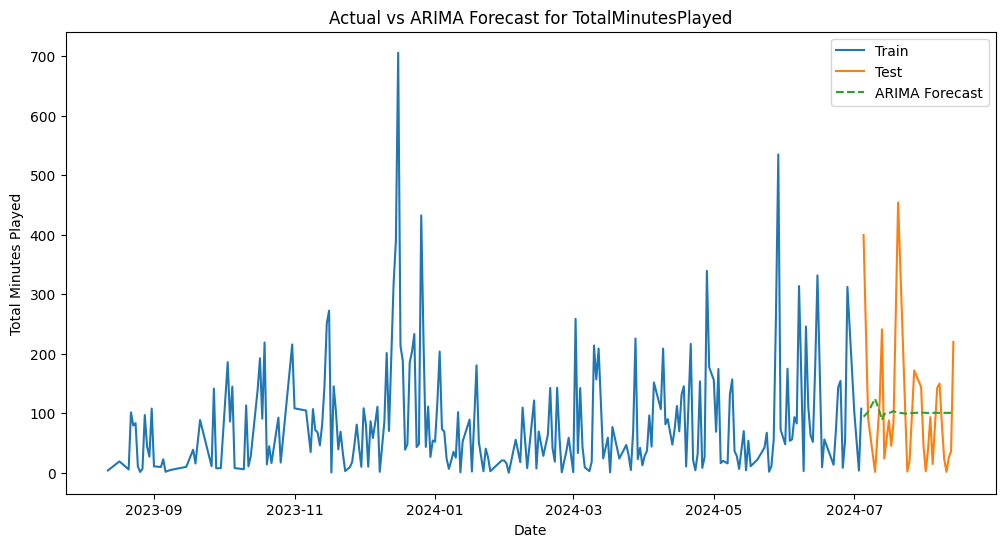

In [71]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Train ARIMA model on training data
model_arima = ARIMA(train_df['TotalMinutesPlayed'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Forecast the testing period
forecast_arima = model_arima_fit.forecast(steps=len(test_df))

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['TotalMinutesPlayed'], label='Train')
plt.plot(test_df.index, test_df['TotalMinutesPlayed'], label='Test')
plt.plot(test_df.index, forecast_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Actual vs ARIMA Forecast for TotalMinutesPlayed')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.legend()
plt.show()

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



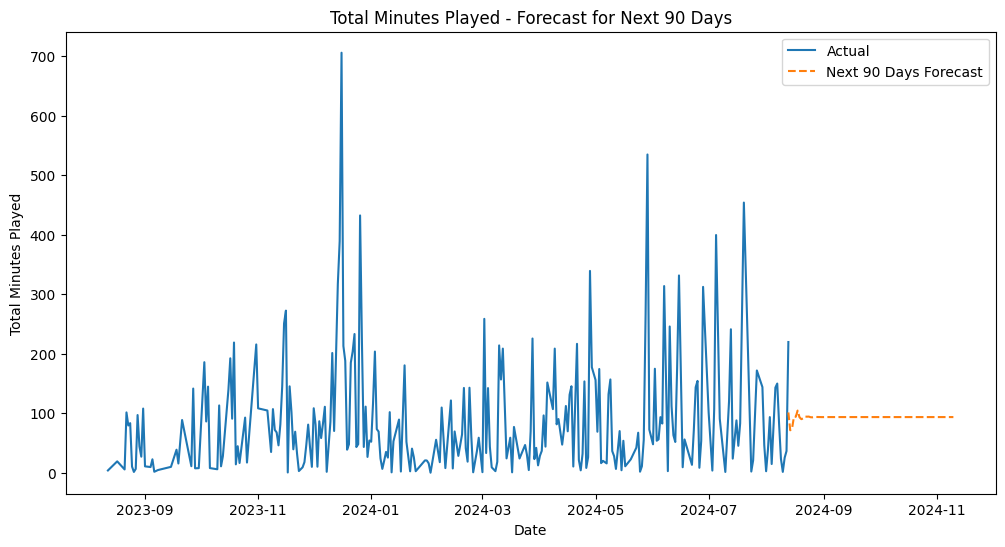

In [72]:
# Fit ARIMA on the full dataset
model_arima_full = ARIMA(daily_stats['TotalMinutesPlayed'], order=(5, 1, 0))
model_arima_full_fit = model_arima_full.fit()

# Forecast the next 90 days
forecast_next_90_days = model_arima_full_fit.forecast(steps=90)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['TotalMinutesPlayed'], label='Actual')
plt.plot(pd.date_range(daily_stats.index[-1], periods=90, freq='D'), forecast_next_90_days, label='Next 90 Days Forecast', linestyle='--')
plt.title('Total Minutes Played - Forecast for Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.legend()
plt.show()


In [73]:
import plotly.graph_objs as go
import plotly.offline as py

# Actual vs Predicted Plot
actual_trace = go.Scatter(
    x=test_df.index,
    y=test_df['TotalMinutesPlayed'],
    mode='lines',
    name='Actual'
)

predicted_trace = go.Scatter(
    x=test_df.index,
    y=forecast_arima,
    mode='lines',
    name='ARIMA Predicted',
    line=dict(dash='dash')
)

# Combine all traces
data = [actual_trace, predicted_trace]

# Layout
layout = go.Layout(
    title='Actual vs Predicted Total Minutes Played',
    xaxis={'title': 'Date'},
    yaxis={'title': 'Total Minutes Played'},
    hovermode='closest'
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
py.iplot(fig)


Autogluon

In [153]:
import json
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# Load JSON data
with open('./Spotify Account Data/StreamingHistory_music_0.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'endTime' to datetime
df['endTime'] = pd.to_datetime(df['endTime'])

# Extract date and time parts
df['DateTime'] = df['endTime']
df['Date'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

# Set 'DateTime' as the index
df.set_index('DateTime', inplace=True)

# Resample to hourly frequency
hourly_df = df.resample('H').agg({
    'msPlayed': 'sum'  # Sum minutes played for each hour
}).reset_index()

# hourly_df['DateTime'].unique().tolist()
hourly_df['TotalMinutesPlayed'] = hourly_df['msPlayed']/1000/60
hourly_df.drop('msPlayed',axis=1,inplace=True)
# Fill missing hours with 0
hourly_df['TotalMinutesPlayed'].fillna(0, inplace=True)
# Add additional columns if needed (like Date and Hour) for clarity
hourly_df['Date'] = hourly_df['DateTime'].dt.date
hourly_df['Hour'] = hourly_df['DateTime'].dt.hour

# Create a unique ID for each date
hourly_df['DateID'] = hourly_df['DateTime'].astype('category').cat.codes + 1
# Print the resulting DataFrame
print(hourly_df[12:].head(24))  # Print the first 24 hours to check

              DateTime  TotalMinutesPlayed        Date  Hour  DateID
12 2023-08-13 00:00:00                 0.0  2023-08-13     0      13
13 2023-08-13 01:00:00                 0.0  2023-08-13     1      14
14 2023-08-13 02:00:00                 0.0  2023-08-13     2      15
15 2023-08-13 03:00:00                 0.0  2023-08-13     3      16
16 2023-08-13 04:00:00                 0.0  2023-08-13     4      17
17 2023-08-13 05:00:00                 0.0  2023-08-13     5      18
18 2023-08-13 06:00:00                 0.0  2023-08-13     6      19
19 2023-08-13 07:00:00                 0.0  2023-08-13     7      20
20 2023-08-13 08:00:00                 0.0  2023-08-13     8      21
21 2023-08-13 09:00:00                 0.0  2023-08-13     9      22
22 2023-08-13 10:00:00                 0.0  2023-08-13    10      23
23 2023-08-13 11:00:00                 0.0  2023-08-13    11      24
24 2023-08-13 12:00:00                 0.0  2023-08-13    12      25
25 2023-08-13 13:00:00            

In [154]:
# Prepare training data
train_data = TimeSeriesDataFrame.from_data_frame(
    hourly_df[12:].drop(['Date','Hour'], axis=1),
    id_column="DateID",
    timestamp_column="DateTime"
)

train_data


,,TotalMinutesPlayed
item_id,timestamp,
13,2023-08-13 00:00:00,0.000000
14,2023-08-13 01:00:00,0.000000
15,2023-08-13 02:00:00,0.000000
16,2023-08-13 03:00:00,0.000000
17,2023-08-13 04:00:00,0.000000
...,...,...
8805,2024-08-13 08:00:00,0.000000
8806,2024-08-13 09:00:00,41.106167
8807,2024-08-13 10:00:00,15.652033


In [ ]:
# Initialize and fit the predictor
predictor = TimeSeriesPredictor(
    path="autogluon-m4-hourly",
    target="TotalMinutesPlayed",
    eval_metric="MASE",
    freq='h'
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600
)